In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """生成y = xw + b +噪声"""
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2 ,-3.4],dtype=torch.float)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print("features", features[0],'\nlabels', labels[0])

features tensor([ 0.6741, -0.7491]) 
labels tensor([8.0926])


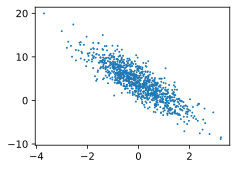

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(),1 )

In [6]:
# 生成迭代器
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = torch.randperm(num_examples)
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10

In [8]:
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0814, -0.6666],
        [-0.4279,  0.0965],
        [-0.4279,  0.0965],
        [-0.1528,  1.9260],
        [ 3.0246, -1.3998],
        [-0.1528,  1.9260],
        [ 0.3710,  0.3301],
        [ 1.0814, -0.6666],
        [ 0.0126,  2.5379],
        [ 1.0814, -0.6666]]) 
 tensor([[ 8.6319],
        [ 3.0168],
        [ 3.0168],
        [-2.6635],
        [15.0081],
        [-2.6635],
        [ 3.8246],
        [ 8.6319],
        [-4.3914],
        [ 8.6319]])


C:\Users\furoc\AppData\Local\Temp\ipykernel_16104\3939589794.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])


In [21]:
w = torch.normal(0,0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [10]:
# 线性回归模型
def linear_regression(X, w, b):
    return torch.matmul(X, w) + b

In [11]:
# 均方损失
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [12]:
# 小批量随机梯度下降
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [19]:
lr = 0.03
num_epochs = 5
net = linear_regression
loss = square_loss

In [22]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch}, loss: {float(train_l.mean()):f}')

epoch 0, loss: 0.062767
epoch 1, loss: 0.000444
epoch 2, loss: 0.000051
epoch 3, loss: 0.000048
epoch 4, loss: 0.000048


C:\Users\furoc\AppData\Local\Temp\ipykernel_16104\3939589794.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])


In [23]:
w

tensor([[ 2.0000],
        [-3.3998]], requires_grad=True)

In [24]:
b

tensor([4.2007], requires_grad=True)

# 线性回归的简洁实现

In [25]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [29]:
true_w = torch.tensor([2 ,-3.4],dtype=torch.float)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [28]:
def loda_array(data_array, batch_size, is_train=True):
    """构造一个迭代器"""
    dataset = data.TensorDataset(*data_array)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [32]:
batch_size = 10
data_iter = loda_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-0.0193, -1.3850],
         [-1.1501, -1.1078],
         [ 1.4467, -0.5269],
         [ 2.1054, -0.1117],
         [ 1.1573, -0.1677],
         [ 1.4424, -0.6679],
         [-1.6737, -0.1081],
         [ 1.0116, -2.2611],
         [-0.9116,  0.0851],
         [-1.2252, -0.2828]]),
 tensor([[ 8.8696],
         [ 5.6794],
         [ 8.8890],
         [ 8.7894],
         [ 7.0748],
         [ 9.3635],
         [ 1.2059],
         [13.9237],
         [ 2.0777],
         [ 2.7041]])]

SyntaxError: can't use starred expression here (2577550256.py, line 1)